In [1]:
#导入包(PypI)
import requests
from lxml import html
import re
import matplotlib.pyplot as plt
import numpy as np

D:\python3.11\Lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.1) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
AllPlayers_url="https://steamstats.cn/"
AllPlayers_headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36 Edg/112.0.1722.64'
}

In [3]:
AllPlayers_data=requests.get(url=AllPlayers_url,headers=AllPlayers_headers)
bytes_data=AllPlayers_data.content.decode()
element=html.fromstring(bytes_data)
present_time=element.xpath('//div[@class="panel pa-3"]/div/text()')[0]#现在时间
present_time=present_time.strip()
all_online=element.xpath('//div[@class="panel pa-3"]/div/span[1]/text()')[0]#在线中人数
all_online=''.join(filter(str.isdigit,all_online))
all_ingame=element.xpath('//div[@class="panel pa-3"]/div/span[2]/text()')[0]#游戏中人数
all_ingame=''.join(filter(str.isdigit,all_ingame))
print("当前数据更新时间:",present_time)
print("Steam当前在线人数:",all_online)
print("Steam当前游戏中玩家:",all_ingame)

当前数据更新时间: 2023-05-03 23:10
Steam当前在线人数: 28700589
Steam当前游戏中玩家: 7324089


In [4]:
page_list=['p.1','p.2']
name_list=[]
current_players=[]

for i in page_list:
    url="https://steamcharts.com/top/"+str(i)
    headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.41'
    }
    data=requests.get(url=url,headers=headers)
    bytes_data=data.content.decode()
    name_list=name_list+re.findall('<a href="/app/.*?">\n\t\t\t\t\t\t(.*?)\n\t\t\t\t\t</a>',bytes_data,re.S)
    current_players=current_players+re.findall('<td class="num">(.*?)</td>',bytes_data,re.S)

#替换其他数据
name_list[10]='其他'
x=int(all_ingame)
for i in range(0,10):
    x=x-int(current_players[i])
others=str(x)
current_players[10]=others
print(name_list)
print(current_players)

['Counter-Strike: Global Offensive', 'Dota 2', 'Apex Legends', 'PUBG: BATTLEGROUNDS', 'Grand Theft Auto V', 'NARAKA: BLADEPOINT', 'Don&#39;t Starve Together', 'Wallpaper Engine', 'Call of Duty®: Modern Warfare® II | Warzone™ 2.0', 'Destiny 2', '其他', 'War Thunder', 'Rust', 'Team Fortress 2', 'Unturned', 'Lost Ark', 'Football Manager 2023', 'Path of Exile', 'ARK: Survival Evolved', 'Tom Clancy&#39;s Rainbow Six Siege', 'EA SPORTS™ FIFA 23', 'Goose Goose Duck', 'Sid Meier&#39;s Civilization VI', 'MONSTER HUNTER RISE', 'MIR4', 'Hearts of Iron IV', 'Red Dead Redemption 2', 'Dead by Daylight', 'DayZ', 'NBA 2K23', 'Terraria', 'Stardew Valley', 'ELDEN RING', 'Monster Hunter: World', 'Euro Truck Simulator 2', 'Left 4 Dead 2', 'The Sims™ 4', 'Project Zomboid', 'Total War: WARHAMMER III', 'STAR WARS Jedi: Survivor™', 'Spacewar', '7 Days to Die', 'Albion Online', 'RimWorld', '雀魂麻将(MahjongSoul)', 'Yu-Gi-Oh!  Master Duel', 'Garry&#39;s Mod', 'Europa Universalis IV', 'Mount &amp; Blade II: Bannerlord

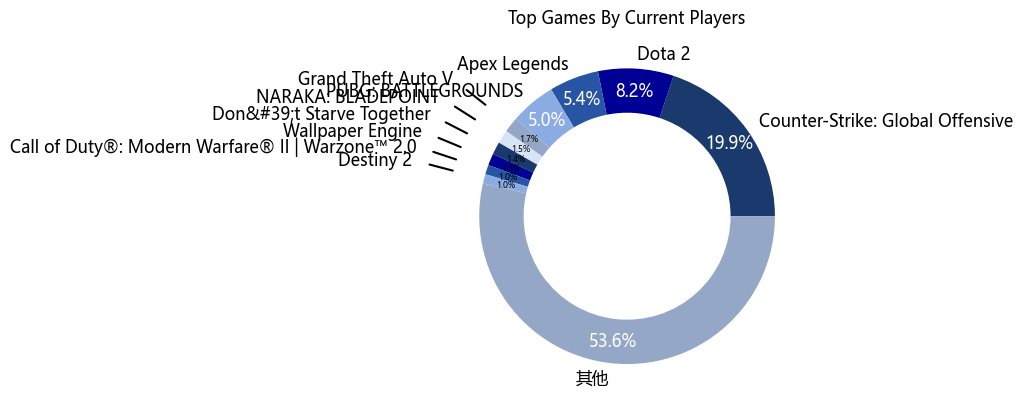

In [5]:
#绘制饼图
plt.rcParams ['font.sans-serif'] = ['Microsoft YaHei']#正常显示中文和特殊符号
plt.rcParams ['axes.unicode_minus'] = False#正常显示负号
colors=["#1A396D", "#000094", "#2755A4", "#8BACE3", "#95A7C7", "#D8E3F6"]#自定义颜色列表
fig, ax=plt.subplots()
wedges, texts, autotexts=ax.pie(current_players[0:11], labels=name_list[0:11], colors=colors, 
                                  autopct='%2.1f%%', radius=1, pctdistance=0.85, wedgeprops=dict(width=0.3),
                                  textprops={'fontsize': 12})
#根据百分比大小设置字体大小
for i, autotext in enumerate(autotexts):
    if float(autotext.get_text().strip('%')) >= 4:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    else:
        autotext.set_fontsize(6)   
#添加引导线
for i, w in enumerate(wedges):
    ang=(w.theta2 - w.theta1)/2. + w.theta1
    y=np.sin(np.deg2rad(ang))
    x=np.cos(np.deg2rad(ang))
    if (autotexts[i].get_text() != '0.0%') and (float(autotexts[i].get_text()[:-1]) < 4):
        ax.annotate('', xy=(x*1.2, y*1.2), xytext=(x*1.4, y*1.4), xycoords='data', 
                    textcoords='data', arrowprops=dict(arrowstyle="-", lw=1.5))
        texts[i].set_position((x*1.5, y*1.5))       
plt.title("Top Games By Current Players")

plt.savefig('环图(缩放)-Top Games By Current Players.png')
plt.show()